<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/air.png?raw=true" width=800 align="left"/>

# 실습 내용

- 머신러닝 모델링을 위한 코딩은 무조건 할 수 있어야 합니다.
- 코딩 내용을 자세히 알지 못해도 **무작정** 코딩을 진행해봅니다.
- AirQuality 데이터를 대상으로 모델링 해서 오존 농도를 예측해 봅니다.
- LinearRegression 알고리즘을 사용합니다.

- 우선 sklearn 버전을 확인하고 필요 시 업그레이드 합니다.

In [1]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)   # 1.0.2

1.2.1


In [2]:
# sklearn 버전 업그레이드 ( 나는 콘다 프롬프트에서 함 )
!pip install scikit-learn --user --upgrade
# 콘다프롬프트) conda install scikit-learn

     ---------------------------------------- 8.4/8.4 MB 4.7 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


- 업그레이드를 하게 되면 Kernel 재시작 후 버전을 다시 확인합니다.

In [2]:
# sklearn 버전 확인
import sklearn
print(sklearn.__version__)   # 1.2.1

1.2.1


# 1.환경 준비

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=700 align="left"/>

In [3]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 여기까진 필수
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [4]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path) # 코딩하는데 시간을 많이 쓰면 안된다. 데이타는 재사용할 일이 많고 csv 파일 경로만 바꿔주면 되기 때문에 df이름은 무조건 data

# 2.데이터 이해

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=700 align="left"/>

In [6]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [7]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [8]:
# 변수 확인
data.info() # null이 아닌 게 146개 있다? 결측치가 있다. 그리고 object 타입이 없으면 머신러닝에 던진다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [9]:
# 기술통계 확인
data.describe() # 왜 디스크라이브냐? 기술한다. 쓰는거! 알려준다! 표준편차를 통해 표준편차가 크면 데이터가 엄청 분산되어 있다는 뜻. 

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


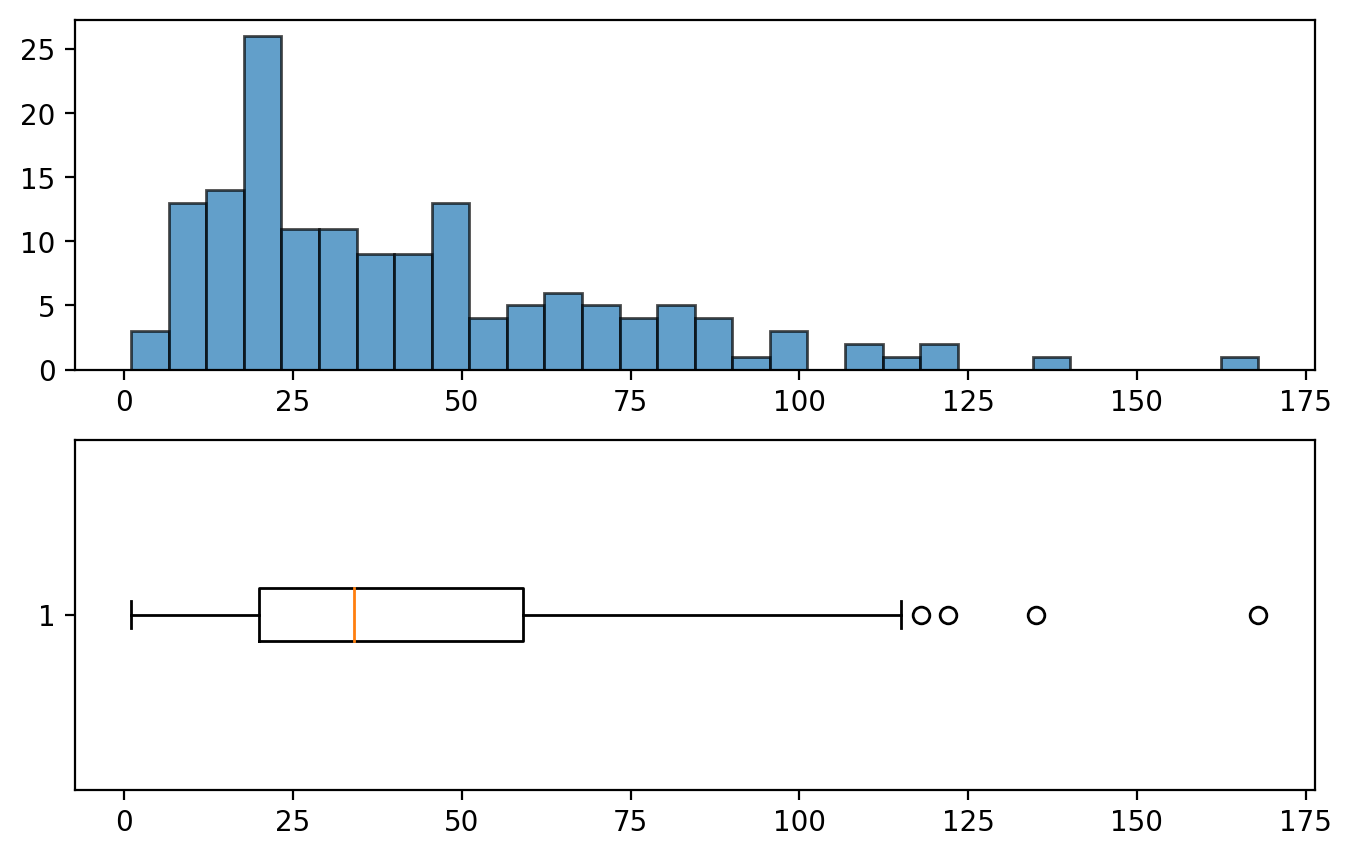

In [15]:
# 종속변수 분포 확인
# 오존농도가 어느 정도 분포되어있는지!
plt.figure(figsize=(8,5)) # 차트 하나를 피규어라고 함
plt.subplot(2, 1, 1)
plt.hist(data['Ozone'], bins=30, alpha=0.7, ec = 'black') # 알파로 투명도 조절 , 엣지칼라는 박스들의 칼라임

plt.subplot(2, 1, 2)
plt.boxplot(data['Ozone'], vert=False) # vert = 수직 여부 # 박스플롯이 없으면 이상치가 있는지 없는지를 판단할 수 없다.
plt.show()

In [16]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


<AxesSubplot:>

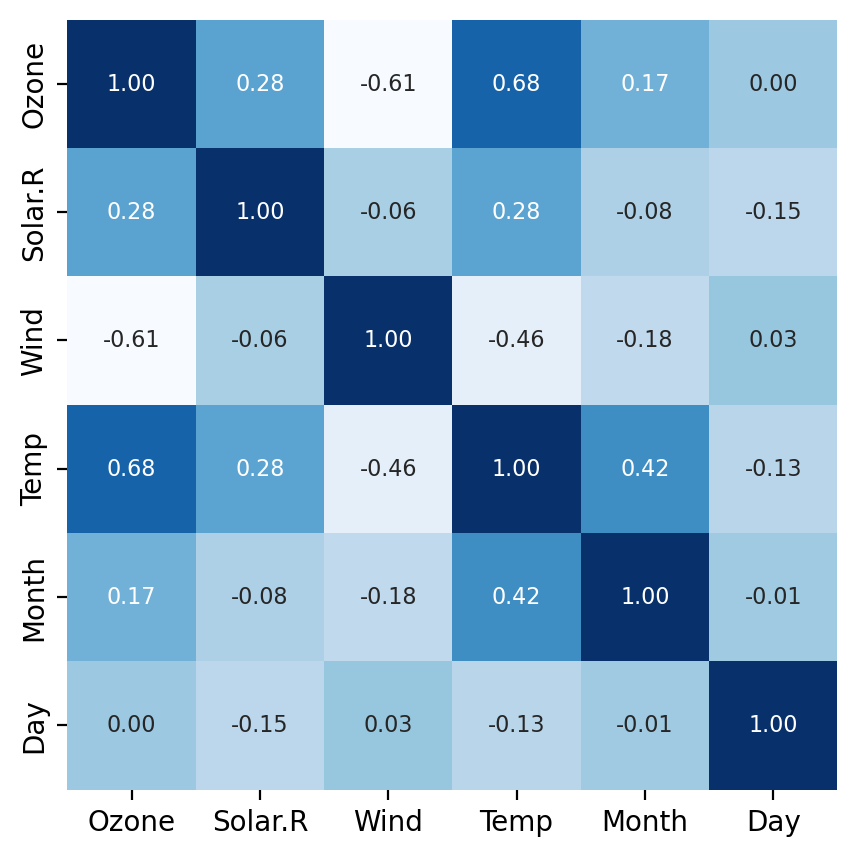

In [20]:
# 상관관계 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(),
            annot = True,
            cmap = 'Blues',
            cbar=False,
            square=True,
            annot_kws={'size':8},
            fmt='.2f') # 포맷 소수점 두자리 플롯! 
# 색갈의 진하기로 어떤 값을 표현해준다. annot = annotaion 글자 표시 cmap = color map, cbar = 오른쪽 컬러바, square 정사각형으로 표현해주세요


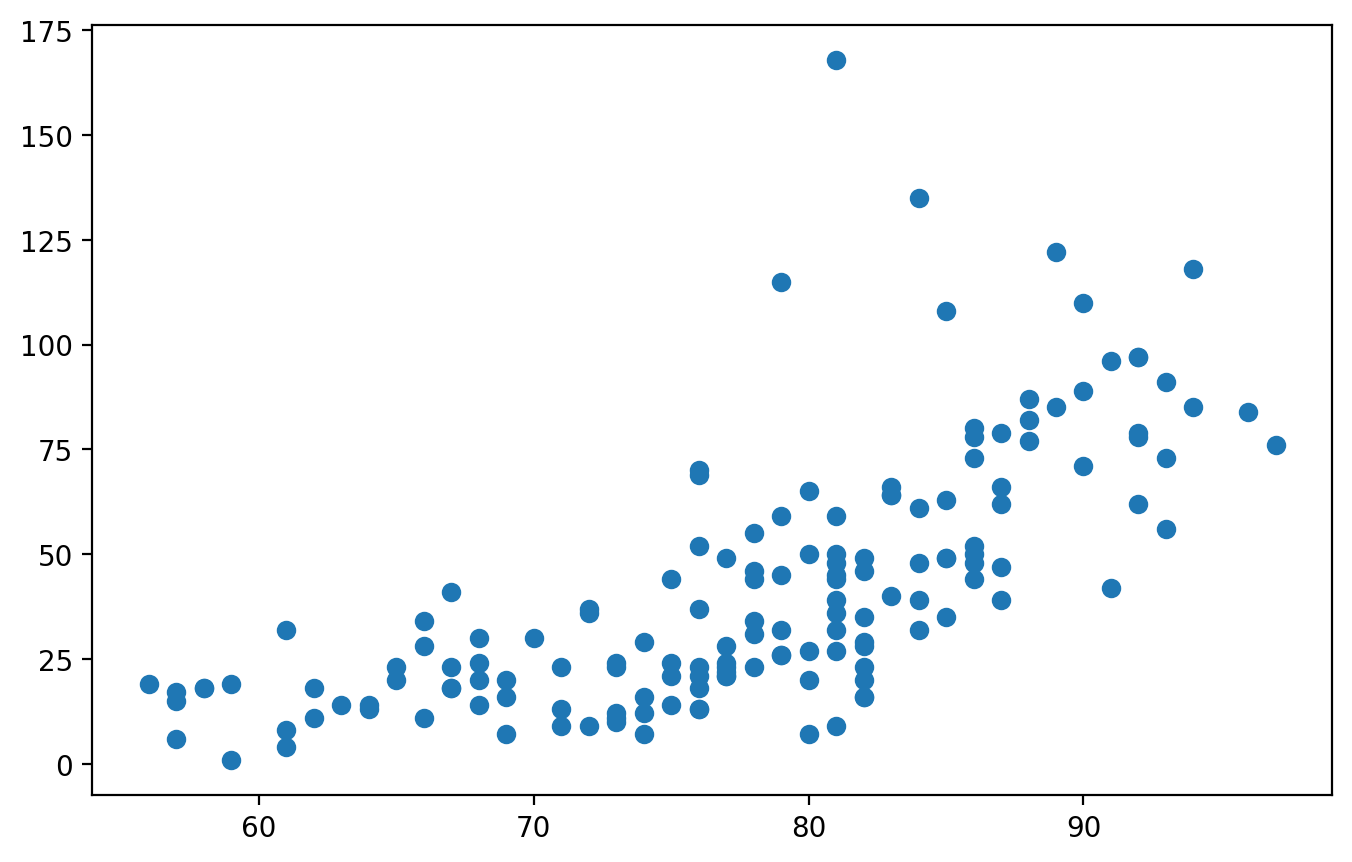

In [21]:
# temp --> ozone 관계
plt.figure(figsize=(8,5))
plt.scatter(data['Temp'], data['Ozone'])

# 3.데이터 준비

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [23]:
# 결측치 확인
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [24]:
# 전날 값으로 결측치 채우기
data.fillna(method = 'ffill', inplace=True) # 삭제할 게 솔라알밖에 없어서 그냥바로 

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [25]:
# 변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis=1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


**3) x, y 분리**

- target 변수를 명확히 지정합니다.
- target을 제외한 변수를 x 데이터프레임으로 선언합니다.
- y 데이터프레임은 target 변수만을 가집니다.

In [32]:
# target 확인
target = 'Ozone'

# 데이터 분리
x = data.drop(target, axis = 1) # 새로운 변수에 할당하지 않을거면 inplace = True 하기, 하면 위험함 날린다. >> 인플레이스 안써주기 기억 반영하지말고 나한테 주세요 
y = data.loc[:, target]


**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

<img src = "https://github.com/Jangrae/img/blob/master/split.png?raw=true" width=600 align="left"/>

In [33]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split # 사이킷런에서 모델셀렉션의여러 함수가 있는데 메모리를 최대한 아끼기 위해서 트레인 테스트 스플릿만 가져온다

# 7:3으로 분리
# 학습과 평가용으로 두동강을 내라
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 정수는 건수, 소수점으로 줘야 퍼센트가 됨 
# random_state 하면 결과가 통일성있게 똑같아짐... 흩어져있는 300명이 같은 결과를 봐야 말이 통하잖아. 강사님과 우리가 똑같은 숫자를 쓰게 되면 같은 수치를 알 수 있음

In [34]:
x_train.head()

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,313.0,14.3,56


<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=700 align="left"/>

# 4.모델링

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=700 align="left"/>

**1) 모델링**

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 우선 다음 알고리즘과 평가 방법을 사용합니다.
    - 알고리즘: LinearRegression
    - 평가방법: mean_absolute_error

In [35]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression # 선형, 회귀 모델을 사용하겠다.
from sklearn.metrics import mean_absolute_error # 오차의 절대값의 평균을 구해보자. 이 값이 작으면 더 좋겠죠?

In [37]:
# 2단계: 선언하기
model = LinearRegression() # 내가 이 리니어레그레이션 알고리즘을 쓰겠읍니다.

In [38]:
# 3단계: 학습하기
model.fit(x_train, y_train) # 엑스트레인에 대한 정답이 뭘까요? 와이트레인이다. 다른 거 주면 큰일난다.

LinearRegression()

In [41]:
# 4단계: 예측하기
y_pred = model.predict(x_test) # 와이프레이드로 예측값을 가져오자. 문자 x 숫자 o

In [42]:
# 결과 확인
# 엑스테스트 문제에 대한 원래 정답은 뭔가요?
print(y_test.values[:10]) # 이게 정답 얘는 시리즈인데 왼쪽이 인덱스고 오른쪽이 값이다. 시리즈는 df랑 달라서 컬럼이라 부르면 안됨 밸류만 보자. 
print(y_pred[:10]) # 우리 모델이 예측한 것

[24 18 97 47 34 22 66 18 69 27]
[13.84003067  5.82919112 81.93563027 58.41267418 50.86150737 31.52971121
 66.8083547  -8.56411529 50.2136544  39.13346172]


In [44]:
# 5단계: 평가하기
# mean_absolute_error(정답, 예측) >>> 13 정도의 오차가 있다.
print('MAE : ', mean_absolute_error(y_test, y_pred))

MAE :  13.976843190385711


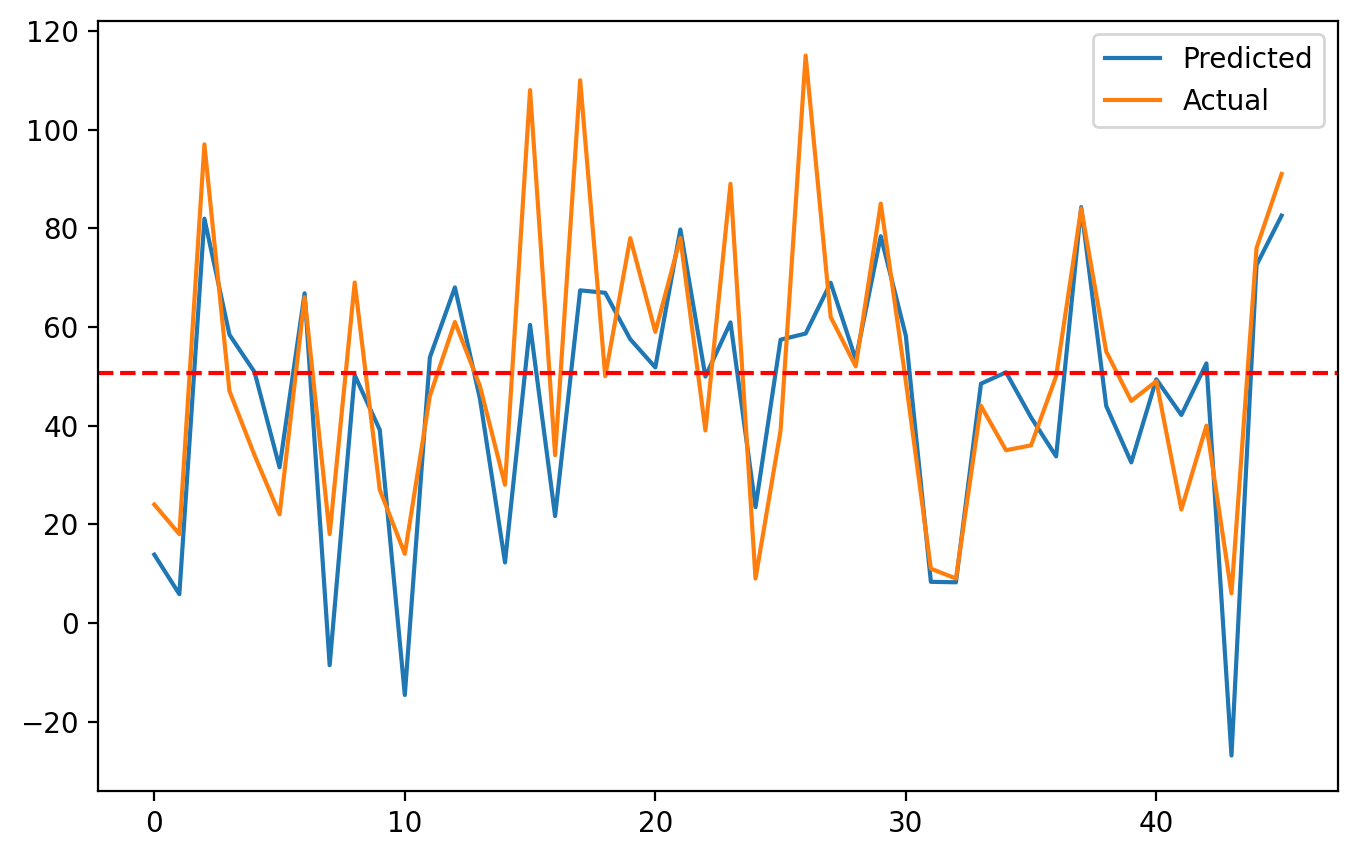

In [51]:
# 결과 시각화
# 얘가 그래도 평듄보다 낫다 하는 
ozone_mean = y_test.values.mean() # 값에 대해서 평균을 구하겠다. 값이 하나니까 values가 없어도됨
plt.figure(figsize=(8, 5))
plt.plot(y_pred, label = 'Predicted') # 예측값임
plt.plot(y_test.values, label = 'Actual') # values가 배열로 리터해줌, 실제 정답임
plt.axhline(ozone_mean, color = 'r', linestyle = '--') 
# 평균. 빨간선보다 주황선이 오차를 엄청나게 줄여줌. 내 생에 처음 모델이 평균보다 잘했으니까 칭찬함
plt.legend()
plt.show()